# Sharpe Ratio

## Introduction

Sharpe Ratio is the most common metric used to measure risk in finance.

The formula is 

> (return on portfolio - risk free rate)/standard deviation of the excess return on the portfolio

There are tons of resources on the internet about sharpe ratio.

[This investopedia page](https://www.investopedia.com/terms/s/sharperatio.asp) is a good introduction.


We assume the risk free rate to be zero, then the formula simply becomes mean returns divided by the standard deviation of returns. 


In [1]:
import numpy as np
import pandas as pd
import empyrical as ep
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Let us create a set of 5 stocks with same monthly returns but with different standard deviation for a period of 20 years. Stocks are named a to e with *a* being the stock with least volatility *e* with the highest volatility

,a,b,c,d,e
count,240.0000,240.0000,240.0000,240.0000,240.0000
mean,0.0104,0.0102,0.0116,0.0089,0.0197
std,0.0051,0.0103,0.0212,0.0479,0.1016
min,-0.0037,-0.0138,-0.0445,-0.0988,-0.2297
25%,0.0068,0.0030,-0.0019,-0.0260,-0.0523
50%,0.0106,0.0103,0.0108,0.0097,0.0274
75%,0.0139,0.0166,0.0259,0.0417,0.0877
max,0.0241,0.0359,0.0717,0.1221,0.2941


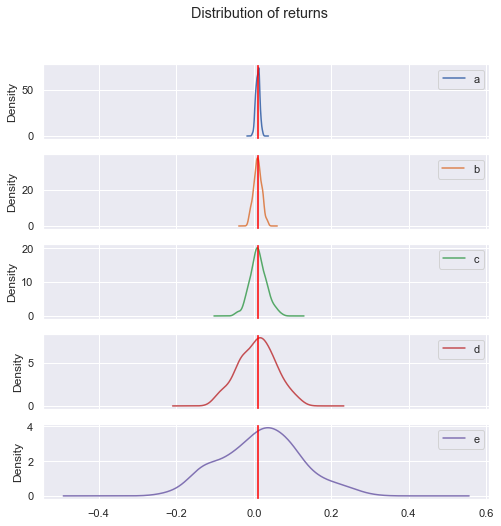

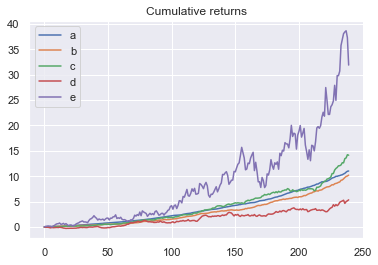

In [2]:
mu = 0.01 #monthly returns
# Express sigma in relation to mean
multipliers = (0.5,1,2,5,10)
collect = {}
for s,m in zip(list('abcde'), multipliers):
    collect[s] = np.random.normal(loc=mu, scale=m*mu, size=240)
df = pd.DataFrame(collect)
axes = df.plot(kind='kde', title='Distribution of returns', subplots=True, figsize=(8,8))
for ax in axes:
    ax.axvline(0.01, color='red')
ep.cum_returns(df).plot(title='Cumulative returns')
df.describe().round(4)

Although all values are generated from the normal distribution with a fixed mean of 0.01, we could see a stark difference.


The first plot shows the distribution or the spread of returns where **a and b** are close to the mean of 0.01 (the red line) while e is just nowhere. You can also look at the table where the minimum and maximum returns for a are -0.3% and 2.25% while for e they are -28.45% and 38%. This implies this is very difficult to infer the mean returns of e as they wildly swing from one extreme to other while on the other hand we could be fairly confident with our estimates for a. From a risk perspective, it is very difficult to differentiate 

A look at the cumulative returns suggests that stock e has left everybody behind and despite wild swings, it is way above; it seems that volatility helps in the long run. But this is only a single simulation of how prices would behave for a given risk/return profile.

Let us now create a simulation of 1000 samples of 240 days for each of the stocks and see how they behave
